In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as sts

In [2]:
np.random.seed(5)

# Предположим, что есть 2 класса с баллами ЕГЭ по математике.
class1 = np.random.randint(30, 100, 30)  #выборка с целыми числами от 30 до 100
class2 = np.random.randint(30, 100, 30)  #выборка с целыми числами от 30 до 100

pd.DataFrame({'class1': class1, 'class2': class2}).describe().loc[['min', 'max', 'mean', '50%']]

,class1,class2
min,30.0,33.0
max,98.0,97.0
mean,60.7,59.5
50%,58.5,59.5


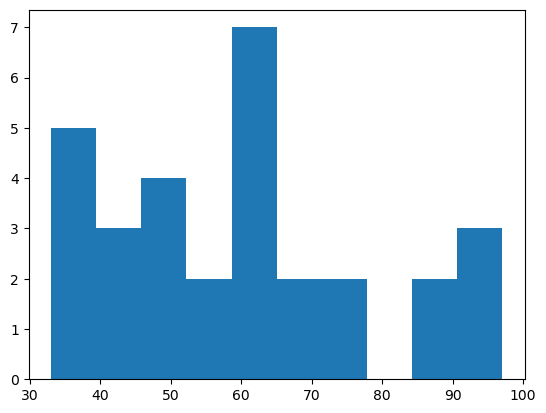

In [3]:
# Постройте гистограмму с 5-ю бинами для class1.
plt.hist(class2, bins=10)
plt.show();

In [4]:
# Любым способом посчитайте для каждой уникальной оценки (для каждого балла) 
# из списка class1 кол-во повторений. 
# Какой балл повторяется чаще всего.

pd.DataFrame(class1).value_counts().idxmax()[0]

np.int32(57)

In [5]:
values, counts = np.unique(class1, return_counts=True)

values[counts.argmax()]

np.int32(57)

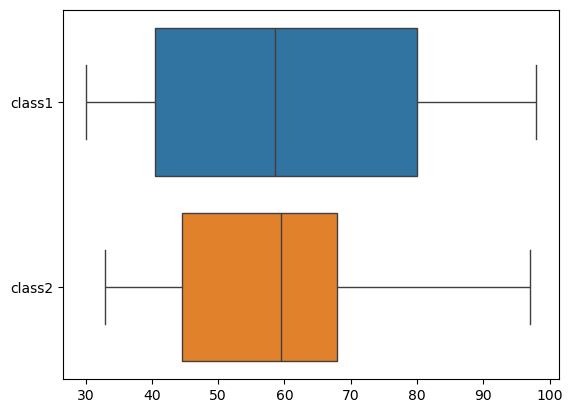

In [6]:
# Постройте 2 boxplot, выберите верные утверждения.

visual_df = pd.DataFrame({'class1': class1, 'class2': class2})

sns.boxplot(visual_df, orient='h')
plt.show()

In [7]:
# Объедините 2 класса (два одномерных массива) в один с помощью метода np.concatenate(). 
# Найдите балл, ниже которого попадают баллы 90% учеников.
# Иначе говоря, найдите значение, которое соответствует 90-му перцентилю (0.9 квантилю).

final_class = np.concatenate([class1, class2], axis=0)
np.quantile(final_class, .9)

np.float64(92.0)

In [8]:
np.quantile([class1, class2], .9)

np.float64(92.0)

In [9]:
# Посчитайте дисперсию для class1. Округлите ответ до двух знаков после запятой.
np.var(class1).round(2)
np.mean(np.square(class1 - np.mean(class1))).round(2)

np.float64(470.94)

In [10]:
# Посчитайте стандартное отклонение для class1. Округлите ответ до одного знака после запятой.
np.std(class1).round(1)

np.float64(21.7)

In [11]:
# Компания по продаже косметики разыгрывает сертификаты номиналом 2 000 рублей, 3 000 рублей и 5 000 рублей. 
# Сертификаты будут разыграны случайно среди топ 20 клиентов, которые принесли компании наибольшую выручку в прошлом месяце.

sertificates = [3000, 3000, 5000, 5000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 3000, 3000]

# Посчитайте среднее.

s_mean = np.mean(sertificates)
s_mean

np.float64(2500.0)

In [12]:
# Какова вероятность, что рандомный клиент получит сертификат номиналом 2 000 рублей?
# Ответ запишите в виде доли. Например 0.4

sertificates.count(2000) / len(sertificates)

0.7

In [13]:
# Какова вероятность, что рандомный клиент получит сертификат номиналом 3 000 или 5 000 рублей?
# Ответ запишите в виде доли. Например 0.4

(sertificates.count(3000) + sertificates.count(5000)) / len(sertificates)

0.3

In [14]:
# Посчитайте матожидание.

np.sum([sertificates.count(i) * i / len(sertificates) for i in np.unique(sertificates)])

np.float64(2500.0)

(array([0.12222222, 0.13333333, 0.15555556, 0.08888889, 0.14444444,
        0.06666667, 0.1       , 0.08888889, 0.11111111, 0.1       ]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

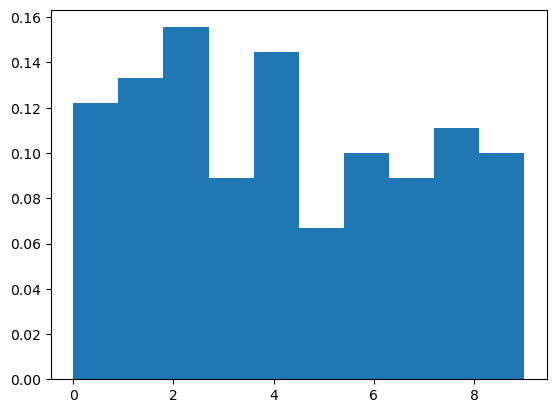

In [15]:
X = np.random.randint(0, 10, 100)
plt.hist(X, density=True)

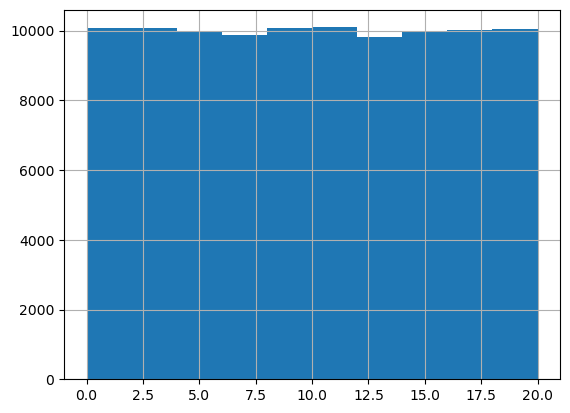

In [16]:
np.random.seed(0)
X = sts.uniform.rvs(0, 20, 100_000)
X = [np.round(i,2) for i in X]
plt.hist(X, bins=10)
plt.grid()

In [17]:
from scipy import stats as sts

mu = 0 #среднее 
std = 1 #стандартное отклонение
norm_rv = sts.norm(0, 1) #нормальное стандартное распределение

# Скопируйте и запустите код выше. 
# С помощью функции  .cdf() посчитайте вероятность того, что случайная величина Х примет значение меньше, чем -1.96. 
# Ответ округлите до 3-х знаков после запятой.

norm_rv.cdf(-1.96)

np.float64(0.024997895148220435)

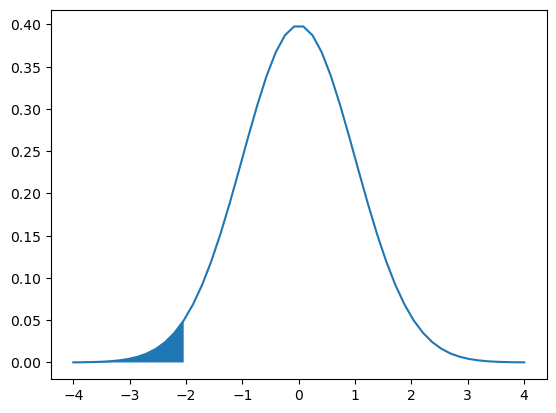

In [18]:
x = np.linspace(-4, 4)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)
plt.fill_between(x, pdf, where=(x >= -4) & (x <= -1.96))
plt.show();

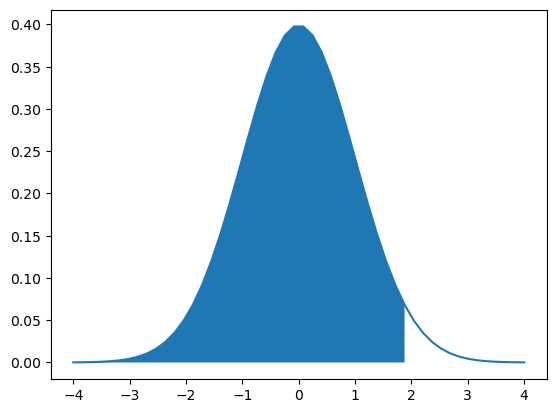

In [19]:
# Скопируйте и запустите код выше. 
# С помощью функции  .cdf() посчитайте вероятность того, что случайная величина Х примет значение меньше, чем 1.96. 
# Ответ округлите до 3-х знаков после запятой.

x = np.linspace(-4, 4)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)
plt.fill_between(x, pdf, where=(x <= 1.96) & (x >= -4))
plt.show();

In [20]:
norm_rv.cdf(1.96)

np.float64(0.9750021048517795)

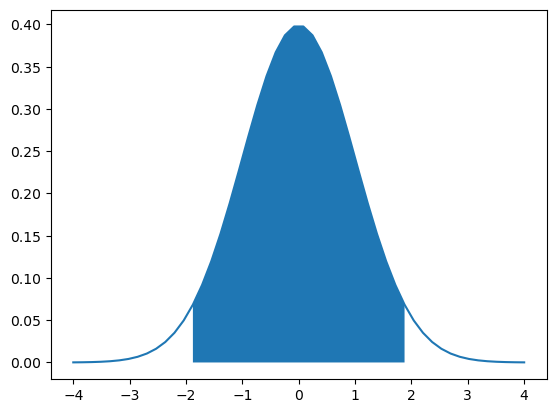

In [21]:
# С помощью функции  .cdf() посчитайте вероятность того, что случайная величина Х 
# примет значение больше -1.96 и меньше 1.96. 
# Ответ округлите до 2-х знаков после запятой.

x = np.linspace(-4, 4)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)
plt.fill_between(x, pdf, where=(x <= 1.96) & (x >= -1.96))
plt.show();

In [22]:
norm_rv.cdf(1.96) - norm_rv.cdf(-1.96)

np.float64(0.950004209703559)

In [23]:
# Зададим уровень значимости α = 0.05.

# Cгенерируйте выборку sample. Код ниже.

import numpy as np
from scipy import stats as sts

np.random.seed(0)
mu = 30
sigma = 10
norm_rv = sts.norm(loc=mu, scale=sigma)
sample = norm_rv.rvs(size=500)

In [24]:
SE = sigma / (500**0.5)
SE

0.4472135954999579

In [25]:
mu = 31
z = (sample.mean() - mu) / SE
z

np.float64(-2.80301047628695)

In [26]:
mu = 0 #среднее 
std = 1 #стандартное отклонение
norm_rv = sts.norm(0, 1) #нормальное стандартное распределение

In [27]:
(norm_rv.cdf(2.58) - norm_rv.cdf(-2.58))

np.float64(0.9901199684844586)

In [28]:
# Задача:
# У нас есть выборка sample.
# Есть предположение, что среднее генеральной совокупности равно 31.
# Необходимо проверить действительно ли среднее генеральной совокупности равно 31 по выборке.
# Стандартное отклонение генеральной совокупности нам тоже не известно.

# Сгенерируйте выборку sample:

import numpy as np
from scipy import stats as sts

np.random.seed(0)
mu = 30
sigma = 10
norm_rv = sts.norm(loc=mu, scale=sigma)
sample = norm_rv.rvs(size=500)

In [29]:
m = sample.mean()
std = sample.std()
m, std

(np.float64(29.746455606675664), np.float64(9.981567773429258))

In [30]:
ESE = std / len(sample)**0.5
ESE

np.float64(0.4463892812681808)

In [31]:
t = (m - 31) / ESE
t

np.float64(-2.808186589433886)

In [32]:
t_stat, p_value = sts.ttest_1samp(sample, 31)
p_value

np.float64(0.005221988377647773)

In [33]:
# Вы работаете в крупной фармацевтической компании, которая разрабатывает медицинские препараты. 
# Ученные вашей компании разработали пластырь, который помогает бороться с курением. 
# Они утверждают, что препарат действует моментально - нужно наклеить пластырь, и желание выкурить сигарету моментально снизится.

# Ученные отобрали 400 курильщиков. 
# Рандомно разделили их на контрольную и тестовую группу по 200 человек в каждой. 
# Тестовая группа в течение недели носила пластырь, а контрольная группа нет. 

# Необходимо проверить эффективен ли пластырь.

# Сгенерируйте 2 выборки. Каждое значение в выборках - это количество выкуренных сигарет за неделю (период проведения эксперимента).

import numpy as np
from scipy import stats as sts

np.random.seed(0)
test = [np.random.randint(30,140) for i in range(200)]
control = [np.random.randint(30,140) for i in range(200)]

In [34]:
f = len(test) + len(control) - 2
f

398

In [35]:
t_stat, p_value = sts.ttest_ind(test, control)
p_value

np.float64(0.831112326758055)

In [36]:
# Анализируя А/Б тест с смс про бонусы, вы нашли зависимость - чем больше бонусов у покупателя, тем выше отклик на коммуникацию.
# Давайте также возьмем покупателей, у которых последняя покупка была от 3 до 2 месяцев назад. Но из них отберем покупателей, у которых на балансе более 30 бонусов.

# Сгенерируйте 2 выборки. Каждое значение в выборке - это успех (совершил покупку в период проведения А/Б теста) и неудача.

import numpy as np
from statsmodels.stats.proportion import proportions_ztest

p_test = 0.14  #Доля вернувшихся из тех, кто получил смс
p_control = 0.10  #Доля вернувшихся из тех, кто не получил смс

# Сгенерируем данные
np.random.seed(2)
test_group = np.random.choice([0, 1], size=1000, p=[1-p_test, p_test])
control_group = np.random.choice([0, 1], size=1000, p=[1-p_control, p_control])

# Посчитайте p-value. Округлите ответ до 3-х знаков после запятой.

z_stat, p_value = proportions_ztest([np.sum(test_group), np.sum(control_group)], [len(test_group), len(control_group)])
z_stat, p_value

(np.float64(2.1940567562600117), np.float64(0.028231329563203986))

In [47]:
# Вернемся к тесту с оттоком. К покупателям с последней покупкой от 3-х до 2-х месяцев назад, 
# у которых на балансе выше 30 бонусов. До этого мы контролировали только ошибку первого рода.

# Вы знаете конверсию без отправки смс:
p_control = 0.10  #Доля вернувшихся из тех, кто не получил смс

# Вы знаете MDE и конверсию после отправки смс:
p_test = 0.14  # Доля вернувшихся из тех, кто получил смс



from scipy import stats as sts

a = 0.05 #уровень значимости альфа, ошибка первого рода
b = 0.2 #ошибка второго рода
p_1 = 0.10 #конверсия или среднее
p_2 = 0.14 #конверсия с учетом MDE

# Посчитайте необходимый размер одной выборки, для того чтобы контролировать ошибку первого и второго рода. 
# альфа = 0.05, бета = 0.2. 
# Ответ округлите.

mde = p_2 - p_1
var = p_1 * (1 - p_1)
var_with_mde = p_2 * (1 - p_2)

z_a = sts.norm.ppf(a/2)
z_b = sts.norm.ppf(b)
print(z_a)
print(z_b)

n = (z_a * (2 * var)**0.5 + z_b * (var + var_with_mde)**0.5)**2 / mde**2
n

-1.9599639845400545
-0.8416212335729142


np.float64(926.5764538633317)

In [ ]:
# У вашего супермаркета Покупочка есть приложение для покупок онлайн. 
# Теперь разработчики разработали новый алгоритм поиска, 
# который должен увеличить средний оборот на пользователя (посетителя сайта) за определенный период времени. 
# Эту метрику еще называют ARPU (Average Revenue Per User).

# На исторических данных вы знаете, что ARPU = 750 рублей, при стандартном отклонении 200 рублей. 
# А вы хотите повысить АRPU на 50 рублей, до 800. 
# Рассчитайте минимальный размер одной выборки. 
# Ответ округлите в большую сторону.

# P. S. Считайте, что дисперсия не изменится.

from scipy import stats as sts

a = 0.05 #уровень значимости альфа, ошибка первого рода
b = 0.2 #ошибка второго рода

var = 200**2
mde = 800 - 750

z_a = sts.norm.ppf(a/2)
z_b = sts.norm.ppf(b)
print(z_a)
print(z_b)

n = (var + var) * (z_a + z_b)**2 / mde**2
n

-1.9599639845400545
-0.8416212335729142


np.float64(251.1641514991709)

In [49]:
# На исторических данных вы знаете, что только 4% покупателей вернутся из глубокого оттока в период проведения АБ теста. Вы рассчитываете, что после отправки смс в тестовой группе вернется 6%. 

# Рассчитайте размер одной выборки для А/Б теста. Округлите ответ.

from scipy import stats as sts

a = 0.05 #уровень значимости альфа, ошибка первого рода
b = 0.2 #ошибка второго рода
p_1 = 0.04 #конверсия или среднее
p_2 = 0.06 #конверсия с учетом MDE

mde = p_2 - p_1
var = p_1 * (1 - p_1)
var_with_mde = p_2 * (1 - p_2)

z_a = sts.norm.ppf(a/2)
z_b = sts.norm.ppf(b)
print(z_a)
print(z_b)

n = (z_a * (2 * var)**0.5 + z_b * (var + var_with_mde)**0.5)**2 / mde**2
n

-1.9599639845400545
-0.8416212335729142


np.float64(1609.1852905470541)

In [51]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

p_test = 0.04  # Доля вернувшихся из тех, кто получил смс
p_control = 0.06  # Доля вернувшихся из тех, кто не получил смс

# Сгенерируем данные
np.random.seed(2)
test_group = np.random.choice([0, 1], size=2000, p=[1-p_test, p_test])
control_group = np.random.choice([0, 1], size=2000, p=[1-p_control, p_control])

# Посчитайте p-value. Округлите ответ до 3-х знаков после запятой.

z_stat, p_value = proportions_ztest([np.sum(test_group), np.sum(control_group)], [len(test_group), len(control_group)])
z_stat, p_value

(np.float64(-2.7061244206561166), np.float64(0.006807353583795346))